In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('Rainfall.csv', index_col=0,
     parse_dates=True, infer_datetime_format=True)

df.head()

,Rainfall
Month,
Jan-19,240
Feb-19,110
Mar-19,160
Apr-19,150
May-19,160


In [18]:
print(df.dtypes)

Rainfall    int64
dtype: object


In [19]:
first_date = df.index[0]
first_date

'Jan-19'

In [20]:
df.Rainfall.head()

Month
Jan-19    240
Feb-19    110
Mar-19    160
Apr-19    150
May-19    160
Name: Rainfall, dtype: int64

<AxesSubplot: xlabel='Month'>

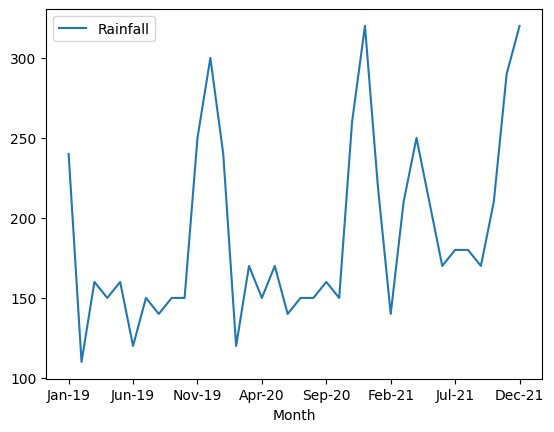

In [21]:
df.plot()

In [22]:
RECENT_PERIOD = 5  # set the recent period
df.Rainfall[-RECENT_PERIOD:]

Month
Aug-21    180
Sep-21    170
Oct-21    210
Nov-21    290
Dec-21    320
Name: Rainfall, dtype: int64

In [23]:
df_recent_period = df[-RECENT_PERIOD:] 

In [24]:
df_recent_period.head()

,Rainfall
Month,
Aug-21,180
Sep-21,170
Oct-21,210
Nov-21,290
Dec-21,320


In [25]:
df_recent_period.Rainfall.mean()  

234.0

In [26]:
df_recent_period.Rainfall.sum()

1170

In [27]:
rolling_mean_5 = df.Rainfall.rolling(window=5).mean().shift(1)  

rolling_mean_12 = df.Rainfall.rolling(window=12).mean().shift(1)

print(df.Rainfall.head())
print("--  rolling mean 5")
print(rolling_mean_5.head())
print("--  rolling mean 12")
print(rolling_mean_12.head())

Month
Jan-19    240
Feb-19    110
Mar-19    160
Apr-19    150
May-19    160
Name: Rainfall, dtype: int64
--  rolling mean 5
Month
Jan-19   NaN
Feb-19   NaN
Mar-19   NaN
Apr-19   NaN
May-19   NaN
Name: Rainfall, dtype: float64
--  rolling mean 12
Month
Jan-19   NaN
Feb-19   NaN
Mar-19   NaN
Apr-19   NaN
May-19   NaN
Name: Rainfall, dtype: float64


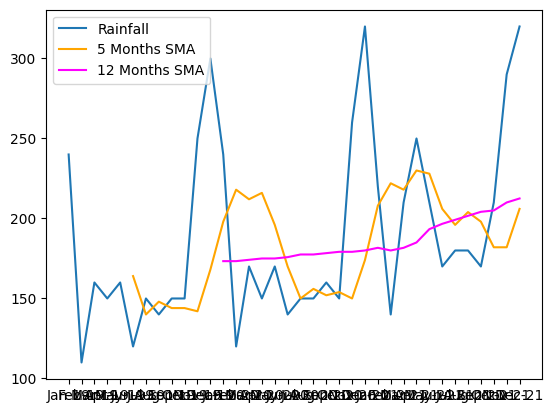

In [28]:
# plot the graphs with different moving average
plt.plot(df.index, df.Rainfall, label='Rainfall')
plt.plot(df.index, rolling_mean_5, label='5 Months SMA', color='orange')
plt.plot(df.index, rolling_mean_12, label='12 Months SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

In [29]:
print("5")

5


In [30]:
print(rolling_mean_5[10])

142.0


In [31]:
rolling_mean_5.to_pickle("moving_average.pkl")

In [32]:
from sklearn.metrics import mean_squared_error 

In [33]:
mean_squared_error(df.Rainfall[5:], rolling_mean_5[5:])

3866.7096774193546

In [34]:
mean_squared_error(df.Rainfall[12:], rolling_mean_12[12:])

2797.7141203703704